# Sistemas Inteligentes

## Laboratório 2 - Classificação

Neste laboratório serão introduzidos: **Linear Discriminant Analysis (LDA)**, **Support Vector Machine (SVM)** e **Artificial Neural Networks (ANN)**.

### Identificação do Aluno

#### Nome Completo

Daniel Escudero

#### RA

11005716

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **dataset**.

Tendo feito o processo adequadamente, a variável dataset conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável X apenas o objeto images de dataset. Analogamente, atribua à variável y o objeto target.

Ainda nesta célula, utilize a função reshape do próprio X para forçar um formato unidimensional para cada imagem dentro do array X, que, originalmente, contém várias imagens com seus pixels distribuidos bidimensionalmente.

In [2]:
from sklearn import datasets

dataset = datasets.load_digits()
x = dataset.images
y = dataset.target
x = x.reshape(len(x), 64)

#### Divisão dos dados em grupos para treinamento e teste.

Importe e utilize a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **X_train**, **X_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [3]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25)

### Linear Discriminant Analysis (LDA)

#### Treinamento

Importe o classificador do LDA, que é uma função chamada **LinearDiscriminantAnalysis** do pacote **discriminant_analysis**, que faz parte da biblioteca **sklearn**. Então crie o classificador com o nome **LDA** atribundo a ele a função **LinearDiscriminantAnalysis**.

Treine o classificador **LDA** por meio de sua própria função **fit()**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **X_train** e **y_train**.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### Classificação e Resultados

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **LDA**. O argumento da função é apenas a entrada de teste, ou seja, **X_test**. Atribua a saída dessa classificação à variável **y_pred_LDA**.

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**, então imprima a acurácia do classificador lda e sua confusion matrix.

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_lda = lda.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_lda)
matrix = confusion_matrix(y_test, y_pred_lda)

print(accuracy)
print(matrix)

0.9488888888888889
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  2  1]
 [ 0  0 40  2  0  0  0  0  0  0]
 [ 0  0  0 38  0  1  0  0  2  2]
 [ 0  1  0  0 43  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  1  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  1]
 [ 0  5  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  0  1 45]]


### Support Vector Machine (SVM)

#### Treinamento

Importe a função **LinearSVC**, pertencente ao pacote **svm** da biblioteca **sklearn**, então crie o classificador chamado **SVM**, análogo ao que foi feito com o LDA anteriormente.

Então, treine o classificador **SVM** utilizando a função **fit** com os dados de treinamento, **X_train** e **y_train**, respectivamente.

In [6]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Classificação e Resultados

Faça a classificação dos dados de entrada para testes, **X_test**, utilizando a função **predict** do próprio **SVM** e armazene os resultados em **y_pred_SVM**.

Na mesma célula, verifique a acurácia do classificador **SVM** por meio da função **accuracy_score** e mostre a matriz de confusão do classificador **SVM** utilizando a função **confusion_matrix**.

In [7]:
y_pred_svm = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_svm)
matrix = confusion_matrix(y_test, y_pred_svm)

print(accuracy)
print(matrix)

0.96
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  1  1  0]
 [ 0  0 39  3  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  2]
 [ 0  1  0  0 44  0  0  0  0  0]
 [ 0  1  0  0  0 55  0  0  1  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0]
 [ 0  3  0  1  0  0  0  0 42  0]
 [ 1  0  0  0  0  1  0  0  0 45]]


### Artificial Neural Networks (ANN)

#### Treinamento

Importe a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então crie o classificador **ANN** usando a função importada com os parâmetros e **hidden_layer_sizes=(50)**.

Depois, treine o classificador usando os dados de entrada e saída de treinamento.

In [8]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(50))
ann.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

#### Classificação e Resultados

Faça a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprima a acurácia e a matriz de confusão dessa classificação.

In [9]:
y_pred_ann = ann.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_ann)
matrix = confusion_matrix(y_test, y_pred_ann)

print(accuracy)
print(matrix)

0.9755555555555555
[[39  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  0  0  0]
 [ 0  1  0  0 43  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0]
 [ 0  4  0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  1 46]]


#### Análise para diferentes quantidades de neurônios

Faça, iterativamente, com que seja treinada e testada uma rede neural de uma camada, utilizando uma quantidade crescente de neurônios, indo de 1 a 50. Armazene o valor da acurácia para cada iteração, então imprima as seguintes estatísticas sobre a acurácia: mínima, máxima, média, mediana, moda, variância e desvio padrão.

In [15]:
import statistics

scores = []
for neurons in range(1,51):
    ann = MLPClassifier(hidden_layer_sizes=(neurons))
    ann.fit(x_train, y_train)
    predicted = ann.predict(x_test)
    
    score = accuracy_score(y_test, predicted)
    scores.append(score)

minScore = min(scores)
maxScore = max(scores)
mean = statistics.mean(scores)
median = statistics.median(scores)
mode = statistics.mode(scores)
variance = statistics.variance(scores)
stdev = statistics.stdev(scores)

print('min', minScore)
print('max', maxScore)
print('mean', mean)
print('median', median)
print('mode', mode)
print('variance', variance)
print('stdev', stdev)

min 0.19333333333333333
max 0.9755555555555555
mean 0.9008
median 0.9622222222222222
mode 0.9688888888888889
variance 0.030338072058453014
stdev 0.1741782766548487


Utilizando subplots, gere o gráfico da acurácia do classificador para cada quantidade de neurônios na camada da rede neural e o gráfico do erro, considerando como o erro a diferença entre as acurácias das últimas duas iterações para cada iteração.

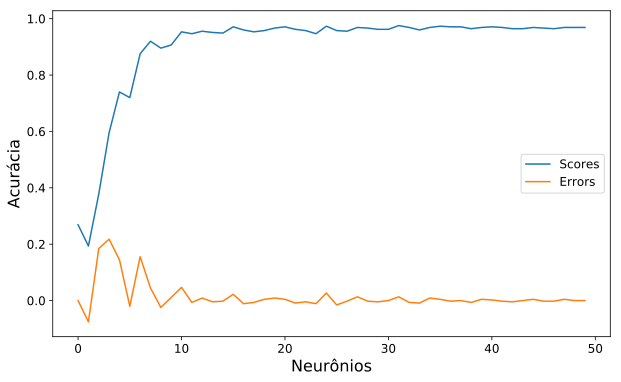

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# Inicializa erros com 0, pois nao há nenhum no primeiro valor de acuracia
errors = [0]
errors.extend([scores[i] - scores[i-1] for i in range(1, 50)])

# Plot scores e errors
plt.plot(range(50), scores, label="Scores")
plt.plot(range(50), errors, label="Errors")

# labels
plt.xlabel("Neurônios")
plt.ylabel("Acurácia")
plt.legend()

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)